In [1]:
# with tensorflow as ml framework
# main objective to focus on -> tokenization, padding, truncating sequence, RNN

In [2]:
# will use NLP and DL to perform text classification
# their are 6 emotion varients and the data is already preprocessed

In [3]:
#import dataset
import pandas as pd
df=pd.read_pickle("merged_training.pkl")

In [4]:
df.head(5)

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


In [5]:
df['emotions'].value_counts()

,count
emotions,
joy,141067
sadness,121187
anger,57317
fear,47712
love,34554
surprise,14972


In [6]:
df.isnull().sum()

,0
text,0
emotions,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416809 entries, 27383 to 64703
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      416809 non-null  object
 1   emotions  416809 non-null  object
dtypes: object(2)
memory usage: 9.5+ MB


In [8]:
df.duplicated().sum()

np.int64(686)

In [9]:
#importing libaries
!pip install nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.0 MB/s eta 0:00:00


In [10]:
%matplotlib inline

import nlp
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [11]:
#from datasets import load_dataset

# Load the emotion dataset
#dataset = load_dataset('emotion')

In [12]:
type(df)
#df is a pandas DataFrame, because you loaded the data using pd.read_pickle(), which reads data into a DataFrame.

pandas.core.frame.DataFrame

In [13]:
from sklearn.model_selection import train_test_split

x=df['text']
y=df['emotions']


In [14]:
type(x)

pandas.core.series.Series

In [15]:
#converting pandas series to pandas dataframe

x_df = x.to_frame(name='text')
display(x_df.head())

#display ->showing the output of data structures in a more readable way within the notebook.

,text
27383,i feel awful about it too because it s my job ...
110083,im alone i feel awful
140764,ive probably mentioned this before but i reall...
100071,i was feeling a little low few days back
2837,i beleive that i am much more sensitive to oth...


In [16]:
y_df = y.to_frame(name='emotions')
y_df.head()

,emotions
27383,sadness
110083,sadness
140764,joy
100071,sadness
2837,love


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_df,y_df,test_size=0.2,random_state=42,stratify=y)

x_train.shape, x_test.shape, y_train.shape

In [18]:
type(x_train)

pandas.core.frame.DataFrame

In [19]:
#tokenizing -> words to be represented in form of no. to be able present to machine
#simple approach is that -> storing words to corpus and giving each word a unique token
#less commonaly used words and not seen in fit_on_texts() are ignored -> they are given a common token, called out of vocalbury(oov)/unk token


from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='UNK')

# num-words -> top 10,000 most frequent words considered, words ranked beyond are ignored

In [20]:
tokenizer.fit_on_texts(x_train['text'])
#fit_on_text -> build word vocalabury, based on text u pass

#tokenizer.word_index(3)

tokenizer.texts_to_sequences([x_train['text'].iloc[1]])
# as it is asking for a series, but x_train is dic
#text_to_seq -> used to convert text sample to seq of token ids

[[2, 1911, 12, 775, 10, 6, 1704, 8, 46, 271]]

In [21]:
#padding and truncating sequences (done specially in DL)
# ensure all input sequences are of the same length — which is required for batch processing in NN.

In [22]:
#padding -> adds extra zero's to shorter seq, too match desired length
#truncating -> remove tokens from longer sequence, soo to not exceed a maxi. length

In [23]:
#length of tweets
length = [len(t.split(' ')) for t in x_train['text']]

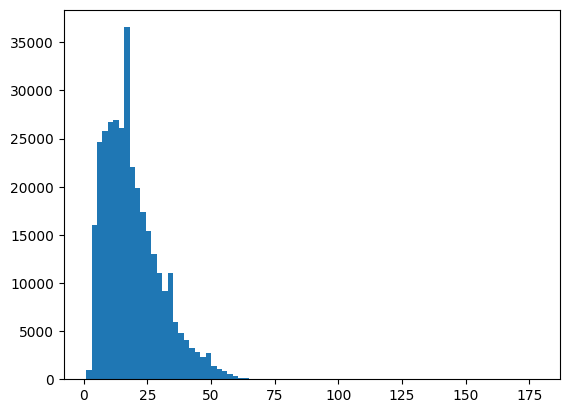

In [24]:
plt.hist(length, bins= len(set(length)))
plt.show()

In [25]:
# the above graph shows that, their are less tweets with 50< words
# and less tweets with >10 words


maxlen= 50  # truncate tweets with 50< words (setting limit)


In [26]:
# for padding and truncating
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
#get sequence for different sets
def get_sequences(tokenizer, text):
  sequences = tokenizer.texts_to_sequences(text)
  padded_seq=pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
  return padded_seq

In [28]:
padded_train_seq = get_sequences (tokenizer, text=x_train['text'])

In [29]:
padded_train_seq [0]

array([   2,    3,   14,    2,   87,   12,    6,  186,   84,  130,  600,
       1737,    7,  370,    1,  193,  172,    1,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [30]:
'''
preparing the labels ->
Preparing the labels" in NLP refers to transforming the target variable (labels)
into a format suitable for training machine learning or deep learning models.

ex. -> labels have different forms depending on the task
like -->
   Sentiment Analysis	[input(text)->"I love it!"]	[output(label)"positive"]
   Spam Detection	[text ->"Win money now!"]	[text -> "spam"]

now this involves ->
  1. encoding category labels to numbers -> label encoders
  2. one hot encoding ->done specially if output label (in neural net) has softmax
  3. handling multi label classification-> one sample with multiple labels
  4. Aligning labels with sequences (for sequence tasks like NER or translation)
        For tasks like Named Entity Recognition:
                  a. Each word/token has a corresponding label.
                  b. Labels must be padded/truncated just like inputs.
'''



'\npreparing the labels ->\nPreparing the labels" in NLP refers to transforming the target variable (labels)\ninto a format suitable for training machine learning or deep learning models.\n\nex. -> labels have different forms depending on the task\nlike -->\n   Sentiment Analysis\t[input(text)->"I love it!"]\t[output(label)"positive"]\n   Spam Detection\t[text ->"Win money now!"]\t[text -> "spam"]\n\nnow this involves ->\n  1. encoding category labels to numbers -> label encoders\n  2. one hot encoding ->done specially if output label (in neural net) has softmax\n  3. handling multi label classification-> one sample with multiple labels\n  4. Aligning labels with sequences (for sequence tasks like NER or translation)\n        For tasks like Named Entity Recognition:\n                  a. Each word/token has a corresponding label.\n                  b. Labels must be padded/truncated just like inputs.\n'

In [31]:
classes = set(y_df['emotions'])

In [32]:
classes

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

In [33]:
# horizontal graph, but correct

#import seaborn as sns
#sns.countplot(y_df['emotions'])
#plt.show()

In [34]:
#plt.hist(classes, bins=11)
#plt.show()

#wrong

In [35]:
#plt.hist(classes, bins=len(classes))
#plt.show()

#wrong graph

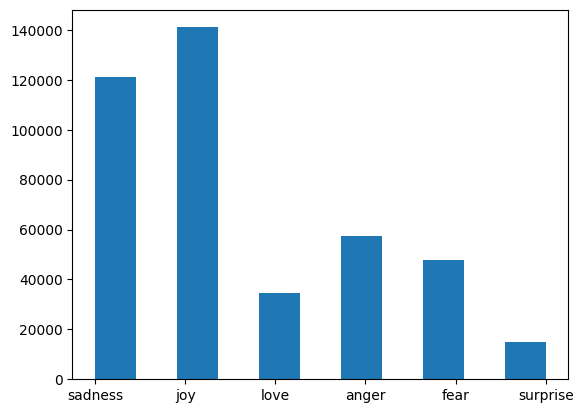

In [36]:
plt.hist(y_df['emotions'], bins=11)
plt.show()

In [37]:
#plt.hist(y_df['emotions'], bins=len(classes))
#plt.show()

#wrong

In [38]:
#dictionaries to convert names of classes to numeric values

classes_to_index = dict((c,i) for i,c in enumerate(classes))
index_to_class = dict((v,k) for k,v in classes_to_index.items())

In [39]:
classes_to_index

{'surprise': 0, 'sadness': 1, 'joy': 2, 'anger': 3, 'love': 4, 'fear': 5}

In [40]:
index_to_class

{0: 'surprise', 1: 'sadness', 2: 'joy', 3: 'anger', 4: 'love', 5: 'fear'}

In [41]:
#function to convert names to id's/numeric values
names_to_id = lambda Labels: np.array([classes_to_index.get(x) for x in Labels])

In [42]:
train_labels = names_to_id(y_train['emotions'])
print(train_labels[0])

3


In [43]:
#converting the labels(y/y_df) -> numberical category (using one hot encoding)

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
'''
to_categorical() is used to convert integer labels into one-hot encoded vectors
,which are often required as output labels for classification
tasks in deep learning models.
'''


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the training labels and transform both train and test labels
y_train_encoded = label_encoder.fit_transform(y_train['emotions'])
y_test_encoded = label_encoder.transform(y_test['emotions'])

# Print the first few encoded training labels
print("Encoded training labels:", y_train_encoded[:5])
print("Original training labels:", y_train['emotions'].head())

Encoded training labels: [0 1 2 0 0]
Original training labels: 20907     anger
35951      fear
122791      joy
32524     anger
57064     anger
Name: emotions, dtype: object


In [44]:
# One-hot encode the numerical labels
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

# Print the first few one-hot encoded training labels
print("One-hot encoded training labels:\n", y_train_one_hot[:5])
print("Shape of one-hot encoded training labels:", y_train_one_hot.shape)

One-hot encoded training labels:
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
Shape of one-hot encoded training labels: (333447, 6)


In [45]:
model = tf.keras.models.Sequential([
    #list of layes to create layers
    tf.keras.layers.Embedding(10000,16,input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6,activation='softmax')
])

model.compile(
    loss = 'categorical_crossentropy',
    #if the values were not hot encoded -> use sparse_categorical_crossentropy
    optimizer = 'adam',
    metrics = ['accuracy'],
    jit_compile=True  # Add this line to explicitly compile the model
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py:212: UserWarning: Model doesn't support `jit_compile=True`. Proceeding with `jit_compile=False`.
  warnings.warn(


In [46]:
'''
embedding ->
   Purpose: Turns word indices (integers) into dense vectors of fixed size.
   1000 → Size of the vocabulary (i.e., max number of words to use).
   16 → Output vector dimension for each word (i.e., 16-dimensional embedding).
Why?
Converts sequences like [15, 72, 999] into [16-d vector, 16-d vector, 16-d vector],
which makes them usable by LSTMs.

bidirectional ->
    LSTM: Recurrent layer that captures sequence and memory dependencies.
    Bidirectional: It processes the sequence from both directions
    (forward and backward) to capture more context.
    return_sequences=True: Needed because you're stacking another LSTM on top,
    so this layer must return full sequences (not just the last output).
Why?
Captures contextual meaning from both past and future words.
Useful for better understanding the sequence.

Bidirectional ->
    Second bidirectional LSTM layer.
    Does not return sequences, so it outputs the final hidden states
    from both directions.
    This gives a single vector representing the entire sentence’s context.
Why?
It condenses the sequence into one meaningful feature vector for classification

dense ->
  Final classification layer.
  6 → Number of output classes (e.g., 6 emotions or categories).
  softmax → Outputs a probability distribution across all 6 classes.
Why?
For multi-class classification, softmax ensures the output sums to 1,
and the highest value indicates the predicted class.

reason for using only 4 layers ->
    1. avoid overfitting
    2. task like email classify, sentimental analysis performs well, with simple
    like 1 embedding, 1 or 2 lstm/gru layer and a dense layer

word of advice ->
If 4-layer model is underfitting, try adding layers or increasing hidden units.
If it's overfitting, try dropout, regularization, or simpler architecture.

'''

"\nembedding ->\n   Purpose: Turns word indices (integers) into dense vectors of fixed size.\n   1000 → Size of the vocabulary (i.e., max number of words to use).\n   16 → Output vector dimension for each word (i.e., 16-dimensional embedding).\nWhy?\nConverts sequences like [15, 72, 999] into [16-d vector, 16-d vector, 16-d vector],\nwhich makes them usable by LSTMs.\n\nbidirectional ->\n    LSTM: Recurrent layer that captures sequence and memory dependencies.\n    Bidirectional: It processes the sequence from both directions\n    (forward and backward) to capture more context.\n    return_sequences=True: Needed because you're stacking another LSTM on top,\n    so this layer must return full sequences (not just the last output).\nWhy?\nCaptures contextual meaning from both past and future words.\nUseful for better understanding the sequence.\n\nBidirectional ->\n    Second bidirectional LSTM layer.\n    Does not return sequences, so it outputs the final hidden states\n    from both dir

In [47]:
model.summary() # why all the values coming as nothing, but in video it has something

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
h = model.fit(
    padded_train_seq, y_train_one_hot,
    validation_split=0.2,
    epochs=10,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ],
    batch_size=32
)

Epoch 1/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 134s 15ms/step - accuracy: 0.7612 - loss: 0.6187 - val_accuracy: 0.8605 - val_loss: 0.3252
Epoch 2/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 133s 16ms/step - accuracy: 0.9333 - loss: 0.1198 - val_accuracy: 0.9362 - val_loss: 0.1102
Epoch 3/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 142s 16ms/step - accuracy: 0.9413 - loss: 0.0954 - val_accuracy: 0.9375 - val_loss: 0.0985
Epoch 4/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 126s 15ms/step - accuracy: 0.9419 - loss: 0.0888 - val_accuracy: 0.9379 - val_loss: 0.0973
Epoch 5/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 141s 15ms/step - accuracy: 0.9434 - loss: 0.0870 - val_accuracy: 0.9372 - val_loss: 0.0987
Epoch 6/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 132s 16ms/step - accuracy: 0.9442 - loss: 0.0843 - val_accuracy: 0.9374 - val_loss: 0.0996


In [49]:
def show_history(h):
    """Plots the training and validation accuracy and loss."""
    epochs_history = len(h.history['loss'])
    plt.figure(figsize=(16,6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0,epochs_history),h.history.get('accuracy'), label='Training Accuracy')
    plt.plot(range(0, epochs_history), h.history.get('val_accuracy'), label='Validation accuracy')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_history), h.history.get('loss'), label='Training loss')
    plt.plot(range(0, epochs_history), h.history.get('val_loss'), label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


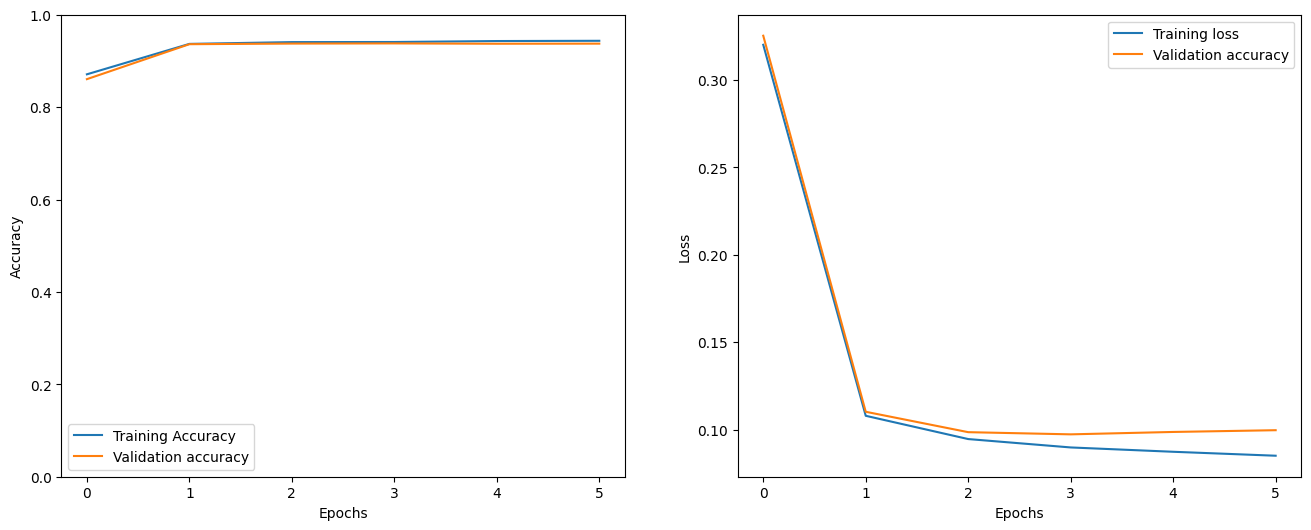

In [50]:
show_history(h)

In this notebook, the validation set is automatically created during the model training phase by setting the validation_split parameter in the model.fit function. This splits a portion of your training data to be used for validation during training.

Specifically, validation_split=0.2 means that 20% of the training data (x_train and y_train_one_hot) is used as the validation set, and the remaining 80% is used for training the model.

In [51]:
x_test_seq = get_sequences(tokenizer, text=x_test['text'])

'''
You're right to ask! The model you've built expects numerical
sequences of a fixed length as input, not raw text.
The get_sequences function performs the necessary steps to transform
the text in x_test into this required format.
'''

"\nYou're right to ask! The model you've built expects numerical\nsequences of a fixed length as input, not raw text.\nThe get_sequences function performs the necessary steps to transform\nthe text in x_test into this required format.\n"

In [52]:
# Encode the test labels using the same label_encoder fitted on training labels
y_test_encoded = label_encoder.transform(y_test['emotions'])

# One-hot encode the numerical test labels
y_test_one_hot = to_categorical(y_test_encoded)

# Print the first few one-hot encoded test labels
print("One-hot encoded test labels:\n", y_test_one_hot[:5])
print("Shape of one-hot encoded test labels:", y_test_one_hot.shape)

'''
the test labels (y_test) need to be in the same format for evaluating
the model's performance, bcoz model was trained on y_train_one_hot.
'''

One-hot encoded test labels:
 [[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]
Shape of one-hot encoded test labels: (83362, 6)


"\nthe test labels (y_test) need to be in the same format for evaluating\nthe model's performance, bcoz model was trained on y_train_one_hot.\n"

In [53]:
model_evaluate = model.evaluate(x_test_seq, y_test_one_hot)

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9375 - loss: 0.1001


In [54]:
# testing on a random
i = random.randint(0, len(x_test)-1) # Changed len(x_train) to len(x_test)
print(x_test.iloc[i]) # Use .iloc to access by integer position

text    i feel lethargic unmotivated needy and frustrated
Name: 38299, dtype: object


In [55]:
predict_random = model.predict(np.expand_dims(x_test_seq[i], axis=0))
pred_class = index_to_class[np.argmax(predict_random).astype('uint8')]
print(pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
love


In [58]:
# Use model.predict and np.argmax instead of predict_classes
predictions = model.predict(x_test_seq)
preds = np.argmax(predictions, axis=1)

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step


In [59]:
# Calculate and display the classification report
print(classification_report(y_test_encoded, preds, target_names=classes))

              precision    recall  f1-score   support

    surprise       0.98      0.91      0.94     11463
     sadness       0.92      0.88      0.90      9542
         joy       0.99      0.92      0.95     28214
       anger       0.77      1.00      0.87      6911
        love       0.97      0.98      0.97     24238
        fear       0.74      0.92      0.82      2994

    accuracy                           0.94     83362
   macro avg       0.89      0.94      0.91     83362
weighted avg       0.95      0.94      0.94     83362



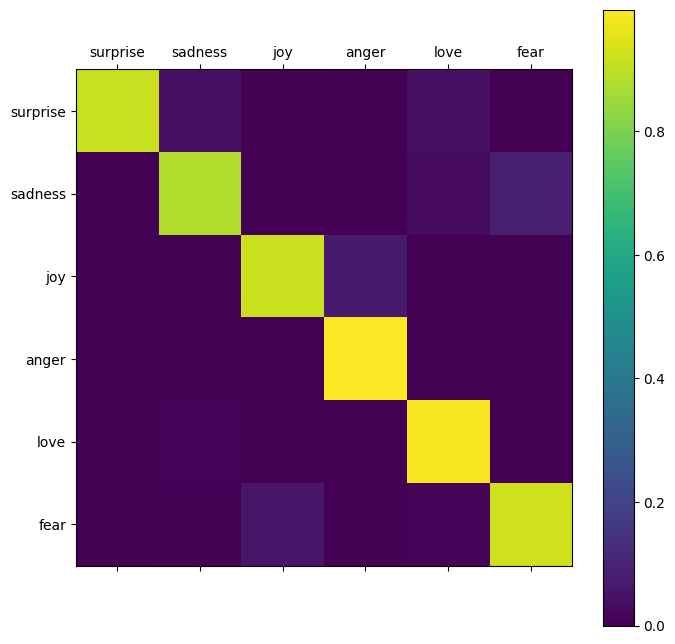

In [60]:
# Display the confusion matrix
show_confusion_matrix(y_test_encoded, preds, classes)

In [ ]:
'''
Result of Confusion Matrix

The confusion matrix you see is a table that summarizes the performance
of your classification model on the test data.

Here's what the different parts represent:

--Rows: Represent the actual (true) classes of the test samples.
--Columns: Represent the predicted classes by your model.
--Diagonal Cells: These cells show the percentage of samples where the
model's prediction matches the actual class. For example, the cell
where "sadness" row intersects with "sadness" column shows,
how many "sadness" samples were correctly predicted as "sadness".
Higher values on the diagonal indicate better performance.

--Off-Diagonal Cells: These cells show the percentage of samples where the
model's prediction is incorrect. For example, the cell where "sadness" row
intersects with "joy" column shows how many "sadness" samples were incorrectly
predicted as "joy". Lower values in the off-diagonal cells indicate better
performance.

In your confusion matrix, the values are normalized, meaning they show the
proportion of samples within each true class that were predicted as each of the
classes. This helps you see which classes are being confused with others.
For example, if a high percentage is in the "sadness" row and "joy" column,
it means your model is often misclassifying "sadness" as "joy".

Looking at your matrix, you can see that the diagonal values are generally
high, indicating good overall accuracy. However, you can also observe where the
model is making mistakes by looking at the off-diagonal cells.
For example, there seems to be some confusion between "anger" and other classes,
and "fear" and other classes, as indicated by the non-zero values in their
respective rows and columns outside the diagonal.

'''